In [1]:
#Considering all columns with categoricalimputation and neumerical impution based on mean

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
# Import model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score,roc_auc_score,roc_curve

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
#Reading Application train csv
data_df = pd.read_csv("UCI_Credit_Card_new.csv")
print(data_df.shape)
print(data_df.head(20))

(30000, 25)
    ID  LIMIT_BAL     SEX        EDUCATION MARRIAGE   AGE  PAY_0  PAY_2  \
0    1      20000  female       university  married  24.0      2      2   
1    2     120000  female       university   single  26.0     -1      2   
2    3      90000  female       university   single  34.0      0      0   
3    4      50000     NaN       university  married  37.0      0      0   
4    5      50000    male       university  married  57.0     -1      0   
5    6      50000    male  graduate school   single  37.0      0      0   
6    7     500000    male  graduate school   single  29.0      0      0   
7    8     100000     NaN       university   single  23.0      0     -1   
8    9     140000     NaN      high school  married  28.0      0      0   
9   10      20000    male      high school      NaN  35.0     -2     -2   
10  11     200000     NaN      high school      NaN  34.0      0      0   
11  12     260000     NaN  graduate school      NaN  51.0     -1     -1   
12  13     63

In [3]:
#Rename column
data_df = data_df.rename(columns={'default.payment.next.month': 'default'})
print(data_df.head())

   ID  LIMIT_BAL     SEX   EDUCATION MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  \
0   1      20000  female  university  married  24.0      2      2     -1   
1   2     120000  female  university   single  26.0     -1      2      0   
2   3      90000  female  university   single  34.0      0      0      0   
3   4      50000     NaN  university  married  37.0      0      0      0   
4   5      50000    male  university  married  57.0     -1      0     -1   

   PAY_4   ...     BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -1   ...           0.0          0        0.0         0       689   
1      0   ...        3272.0       3455     3261.0         0      1000   
2      0   ...       14331.0      14948    15549.0      1518      1500   
3      0   ...       28314.0      28959    29547.0      2000      2019   
4      0   ...       20940.0      19146    19131.0      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0       0.0         0         0         0    

0    23364
1     6636
Name: default, dtype: int64


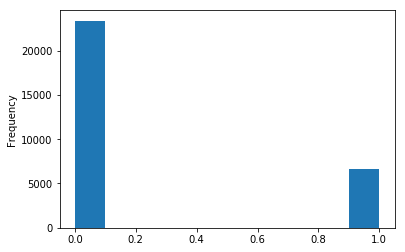

In [4]:
#Let us analyze Target column
print(data_df['default'].value_counts())
data_df['default'].astype(int).plot.hist()

In [5]:
#We can see clearly its a class imbalance problem.
#Now analyze missing value
mis_val = data_df.isnull().sum()
print(mis_val)
#writing the outcome to csv to analyze further
mis_val.to_csv('case2_missing.csv')

ID             0
LIMIT_BAL      0
SEX          113
EDUCATION    161
MARRIAGE     105
AGE           93
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4     21
BILL_AMT5      0
BILL_AMT6     16
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3      18
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
default        0
dtype: int64


In [6]:
# Number of each type of column
print(data_df.dtypes.value_counts())

int64      18
float64     4
object      3
dtype: int64


In [7]:
print(data_df.select_dtypes('object').columns)
print(data_df.select_dtypes('int64').columns)
print(data_df.select_dtypes('float64').columns)

Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object')
Index(['ID', 'LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT5', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')
Index(['AGE', 'BILL_AMT4', 'BILL_AMT6', 'PAY_AMT3'], dtype='object')


In [8]:
#Categorical imputer
imp=SimpleImputer(missing_values="NaN", strategy="most_frequent" )
#cat_col_names=app_train_df.select_dtypes('object').columns
cat_col_names=['SEX', 'EDUCATION', 'MARRIAGE']
for name in cat_col_names:
    print(name)
    data_df[name]=imp.fit_transform(data_df[[name]].astype(str)).ravel()

SEX
EDUCATION
MARRIAGE


In [9]:
#Now analyze missing value
mis_val = data_df.isnull().sum()
print(mis_val)
#writing the outcome to csv to analyze further
mis_val.to_csv('case2_missing_after_cat_impute.csv')

ID            0
LIMIT_BAL     0
SEX           0
EDUCATION     0
MARRIAGE      0
AGE          93
PAY_0         0
PAY_2         0
PAY_3         0
PAY_4         0
PAY_5         0
PAY_6         0
BILL_AMT1     0
BILL_AMT2     0
BILL_AMT3     0
BILL_AMT4    21
BILL_AMT5     0
BILL_AMT6    16
PAY_AMT1      0
PAY_AMT2      0
PAY_AMT3     18
PAY_AMT4      0
PAY_AMT5      0
PAY_AMT6      0
default       0
dtype: int64


In [10]:
data_df.select_dtypes(exclude='object').columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [11]:
#Neumerical imputer
neum_cols=['AGE','BILL_AMT4','BILL_AMT6','PAY_AMT3']
neum_imp = SimpleImputer(missing_values=np.NaN, strategy='mean')
for name in neum_cols:
    print(name)
    data_df[name]=neum_imp.fit_transform(data_df[[name]]).ravel()

AGE
BILL_AMT4
BILL_AMT6
PAY_AMT3


In [12]:
#Now analyze missing value
mis_val = data_df.isnull().sum()
print(mis_val)
#writing the outcome to csv to analyze further
mis_val.to_csv('case2_missing_after_neum_impute.csv')

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


In [13]:
# verifying categories before encoding app_train_df.select_dtypes('object').columns
print(data_df.head())

   ID  LIMIT_BAL     SEX   EDUCATION MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  \
0   1      20000  female  university  married  24.0      2      2     -1   
1   2     120000  female  university   single  26.0     -1      2      0   
2   3      90000  female  university   single  34.0      0      0      0   
3   4      50000     nan  university  married  37.0      0      0      0   
4   5      50000    male  university  married  57.0     -1      0     -1   

   PAY_4   ...     BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -1   ...           0.0          0        0.0         0       689   
1      0   ...        3272.0       3455     3261.0         0      1000   
2      0   ...       14331.0      14948    15549.0      1518      1500   
3      0   ...       28314.0      28959    29547.0      2000      2019   
4      0   ...       20940.0      19146    19131.0      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0       0.0         0         0         0    

In [14]:
#Label encoding
#Encoding category columns
cat_labelencoder = LabelEncoder()
cat_col_names=data_df.select_dtypes('object').columns
for name in cat_col_names:
    print(name)
    data_df[name]=cat_labelencoder.fit_transform(data_df[name])
print(data_df.head())

SEX
EDUCATION
MARRIAGE
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    0          4         0  24.0      2      2     -1     -1   
1   2     120000    0          4         3  26.0     -1      2      0      0   
2   3      90000    0          4         3  34.0      0      0      0      0   
3   4      50000    2          4         0  37.0      0      0      0      0   
4   5      50000    1          4         0  57.0     -1      0     -1      0   

    ...     BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0   ...           0.0          0        0.0         0       689       0.0   
1   ...        3272.0       3455     3261.0         0      1000    1000.0   
2   ...       14331.0      14948    15549.0      1518      1500    1000.0   
3   ...       28314.0      28959    29547.0      2000      2019    1200.0   
4   ...       20940.0      19146    19131.0      2000     36681   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  

In [15]:
X = pd.DataFrame(data_df.drop(['default','ID'], axis=1))
y = pd.DataFrame(data_df['default'])
print(X.shape)
print(y.shape)

(30000, 23)
(30000, 1)


In [16]:
#Train Test Split
#Use X and y variables to split the training data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(24000, 23)
(24000, 1)
(6000, 23)
(6000, 1)


In [17]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After OverSampling, the shape of train_X: (37354, 23)
After OverSampling, the shape of train_y: (37354,) 

After OverSampling, counts of label '1': 18677
After OverSampling, counts of label '0': 18677


In [18]:
print(type(X_train_res))
print(type(y_train_res))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
X_train_res=pd.DataFrame(X_train_res,columns=X_train.columns)
y_train_res=pd.DataFrame(y_train_res,columns=y_train.columns)
print(type(X_train_res))
print(type(y_train_res))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [20]:
X_train=X_train_res
y_train=y_train_res

In [21]:
print(X_train.head())
print(y_train.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE        AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    80000.0  0.0        4.0       3.0  24.000000    0.0    0.0    0.0    0.0   
1    30000.0  1.0        4.0       3.0  28.000000    0.0    0.0    0.0    0.0   
2   180000.0  0.0        3.0       0.0  44.000000    0.0    0.0   -1.0   -1.0   
3    60000.0  1.0        0.0       3.0  35.511084    0.0    0.0    0.0    0.0   
4   130000.0  0.0        4.0       3.0  25.000000    0.0    0.0    0.0    0.0   

   PAY_5    ...     BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0    0.0    ...       78321.0    73731.0    39643.0    39457.0    3503.0   
1    0.0    ...       29155.0    25255.0    22001.0        0.0    5006.0   
2   -1.0    ...         850.0        0.0     6881.0    10340.0       0.0   
3    0.0    ...       38533.0    39639.0    39619.0    39140.0    2018.0   
4    0.0    ...      114734.0   117823.0   120854.0   123904.0    4100.0   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0 

In [22]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train)
X_test_minmax=min_max.transform(X_test)

In [23]:
X_train_minmax=pd.DataFrame(X_train_minmax,columns=X_train.columns)
X_test_minmax=pd.DataFrame(X_test_minmax,columns=X_test.columns)
print(type(X_train_minmax))
print(type(X_test_minmax))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [24]:
X_train=X_train_minmax
X_test=X_test_minmax

In [25]:
#Feature_selection
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0.04169215 0.04768575 0.0394594  0.05377753 0.04082843 0.140785
 0.09926739 0.04398771 0.04126138 0.0327346  0.02295224 0.04798196
 0.03650396 0.03251259 0.02955541 0.03226424 0.03037692 0.0359347
 0.0331121  0.02926849 0.0326418  0.02703085 0.02838538]


In [26]:
randomforest_df=pd.DataFrame(list(zip( X_train.columns, model.feature_importances_)),columns=['Features','Importance_RandomForest'])
print(randomforest_df.head())
print('After RandomForest')

    Features  Importance_RandomForest
0  LIMIT_BAL                 0.041692
1        SEX                 0.047686
2  EDUCATION                 0.039459
3   MARRIAGE                 0.053778
4        AGE                 0.040828
After RandomForest


In [27]:
randomforest_df=randomforest_df.sort_values('Importance_RandomForest',ascending=False)
print(randomforest_df.head(12))

     Features  Importance_RandomForest
5       PAY_0                 0.140785
6       PAY_2                 0.099267
3    MARRIAGE                 0.053778
11  BILL_AMT1                 0.047982
1         SEX                 0.047686
7       PAY_3                 0.043988
0   LIMIT_BAL                 0.041692
8       PAY_4                 0.041261
4         AGE                 0.040828
2   EDUCATION                 0.039459
12  BILL_AMT2                 0.036504
17   PAY_AMT1                 0.035935


In [28]:
top_features= randomforest_df['Features'].head(12).tolist()
print(top_features)

['PAY_0', 'PAY_2', 'MARRIAGE', 'BILL_AMT1', 'SEX', 'PAY_3', 'LIMIT_BAL', 'PAY_4', 'AGE', 'EDUCATION', 'BILL_AMT2', 'PAY_AMT1']


In [29]:
X_train=X_train[top_features]
X_test=X_test[top_features]

# LOGISTIC REGRESSION

In [30]:
# Create instance of model
lreg = LogisticRegression(random_state=42)
# Pass training data into model
lreg.fit(X_train, y_train)
# Predict
y_pred_lreg = lreg.predict(X_test)
# Score It
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,2)
print('Accuracy', logreg_accuracy,'%')
print('roc_auc_score',roc_auc_score(y_test, y_pred_lreg))

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 71.37 %
roc_auc_score 0.6760988041821692


# KNN

In [32]:
# Create instance of model
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit to training data
knn.fit(X_train,y_train)
# Predict
y_pred_knn = knn.predict(X_test)
# Score It
logreg_accuracy = round(accuracy_score(y_test, y_pred_knn) * 100,2)
print('Accuracy', logreg_accuracy,'%')
print('roc_auc_score',roc_auc_score(y_test, y_pred_knn))

C:\Users\nc4716\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Accuracy 76.52 %
roc_auc_score 0.6561553719830141


# DecisionTreeClassifier

In [33]:
# Create model object 35--Accuracy 85.68 % roc_auc_score 0.5404810754456927
dtree = DecisionTreeClassifier(max_depth=35,random_state=42)
# Fit to training sets
dtree.fit(X_train,y_train)
# Predict
y_pred_dt = dtree.predict(X_test)
# Score It
logreg_accuracy = round(accuracy_score(y_test, y_pred_dt) * 100,2)
print('Accuracy', logreg_accuracy,'%')
print('roc_auc_score',roc_auc_score(y_test, y_pred_dt))

Accuracy 73.03 %
roc_auc_score 0.6234427483384468


# RANDOM FOREST

In [34]:
# Create model object 91.9 %,0.5028338420635398, esti-15, max_depth=25
rfc = RandomForestClassifier(n_estimators=15,random_state=42,max_depth=5)
# Fit model to training data
rfc.fit(X_train,y_train)
# Predict
y_pred_rf = rfc.predict(X_test)
# Score It
logreg_accuracy = round(accuracy_score(y_test, y_pred_rf) * 100,2)
print('Accuracy', logreg_accuracy,'%')
print('roc_auc_score',roc_auc_score(y_test, y_pred_rf))

C:\Users\nc4716\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy 79.93 %
roc_auc_score 0.6813139225330519


# XGBClassifier

In [35]:
from xgboost import XGBClassifier
# Basic XGB classifier 
xgb_classifier = XGBClassifier(n_estimators=100,max_depth=3,learning_rate=0.1,random_state=42)
xgb_classifier.fit(X_train,y_train)
# Predict
y_pred_xgb = xgb_classifier.predict(X_test)
# Score It
logreg_accuracy = round(accuracy_score(y_test, y_pred_xgb) * 100,2)
print('Accuracy', logreg_accuracy,'%')
print('roc_auc_score',roc_auc_score(y_test, y_pred_xgb))

C:\Users\nc4716\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nc4716\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 81.67 %
roc_auc_score 0.6595129273804438


In [36]:
from sklearn.model_selection import GridSearchCV
#Grid searching on above algo
n_estimators = [5,10,15,20,25,50,75,100]
#max_depth = [2,3,5,7,9,15,20,25,50,100]
max_depth = [5,7,15,20]
#min_child_weight = [4,5,6,7,8]
min_child_weight = [4,5,6]

# Create parameter grid
#param_grid = {'n_neighbors ': [0.1,1, 10, 100, 1000]}
param_grid1 = {
    'n_estimators':n_estimators,
    'max_depth':max_depth
}
#print(param_grid)
# Import


# Instantiate grid object
grid = GridSearchCV(XGBClassifier(n_estimators=50,random_state=42,learning_rate=.1),param_grid1,scoring='roc_auc', refit = True, verbose = 1)#verbose is the text output describing the process

# Fit to training data
grid.fit(X_train,y_train.values.ravel())
print(grid.best_params_)
# Predict
y_pred_grid_xgb = grid.predict(X_test)
# Score It
logreg_accuracy = round(accuracy_score(y_test, y_pred_grid_xgb) * 100,2)
print('Accuracy', logreg_accuracy,'%')
print('roc_auc_score',roc_auc_score(y_test, y_pred_grid_xgb))

Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\nc4716\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  5.1min finished


{'max_depth': 20, 'n_estimators': 50}
Accuracy 80.1 %
roc_auc_score 0.6450991228350978
